# Abhishek Pise
## Computer Vision Lab
#### Assignment 1

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

What would you like to do?
 1. Translation
 2. Rotation
 3. Scaling
 4. Reflection
 5. Shear
 6. Display Original Image

 3
Enter the scaling factor for 'X' axis:
 0.125
Enter the scaling factor for 'Y' axis:
 0.125


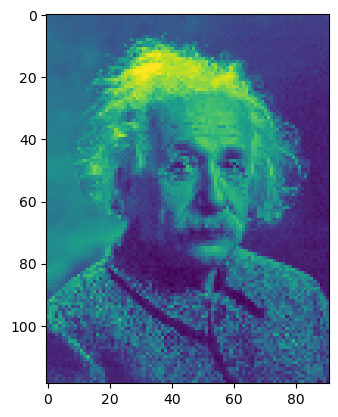

In [19]:
img = cv2.imread('albert-einstein_gray.jpg', cv2.IMREAD_GRAYSCALE)
height, width = img.shape
img_center = (height // 2, width // 2)
abhishek_pise_menu()

In [3]:
def abhishek_pise_menu():
    choice = int(input('What would you like to do?\n 1. Translation\n 2. Rotation\n 3. Scaling\n 4. Reflection\n 5. Shear\n 6. Display Original Image\n\n'))

    if choice == 1:
        tx = int(input('Enter by how to shift on X axis'))
        ty = int(input('Enter by how to shift on Y axis'))

        result  = abhishek_pise_translation(img, tx, ty, width, height)
        plt.imshow(result)
        
    elif choice == 2:
        rotation_type = int(input('What direction of rotation do you want? (Default is \'Anti-Clock Wise\')\n 1. Anti-Clock Wise\n 2. Clock Wise\n'))
        degree = float(input('How many degree do you want to rotate?\n'))

        if rotation_type == 2:
            degree *= -1

        scaling_factor = float(input('Enter the scaling factor for this rotation\n'))
        
        result = abhishek_pise_rotation(img, img_center, degree, scaling_factor, width, height)
        plt.imshow(result)
    
    elif choice == 3:
        sx = float(input('Enter the scaling factor for \'X\' axis:\n'))
        sy = float(input('Enter the scaling factor for \'Y\' axis:\n'))
        
        result = abhishek_pise_scaling(img, sx, sy)
        plt.imshow(result)
        
    elif choice == 4:
        reflection_type = int(input('Enter the type of reflection (Default will be X axis)\n 1. On X axis\n 2. On Y axis'))

        result = abhishek_pise_reflection(img, reflection_type, width, height)
        plt.imshow(result)
        
    elif choice == 5:
        shx = shy = 1
        shear_type = int(input('Enter the type of shear (Default will be X axis)\n 1. On X axis\n 2. On Y axis'))

        if shear_type == 2:
            shy = float(input('Enter the shear factor for Y axis'))
        else:
            shx = float(input('Enter the shear factor for X axis'))

        result = abhishek_pise_shear(img, shear_type, width, height, shx, shy)
        plt.imshow(result)
        
    elif choice == 6:
        
        plt.imshow(img)
        
    else:
        print('Wrong input.\nWill be closing the program.\n\nExiting... .. .')

In [5]:
def abhishek_pise_translation(copy_img, tx, ty, width, height):
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    translated_img = cv2.warpAffine(copy_img, translation_matrix, (width, height))
    return translated_img

In [7]:
def abhishek_pise_rotation(copy_img, img_center, angle, scaling_factor, width, height):
    rotation_matrix = cv2.getRotationMatrix2D(img_center, angle, scaling_factor)

    rotated_img = cv2.warpAffine(copy_img, rotation_matrix, (width, height))
    return rotated_img

In [9]:
def abhishek_pise_scaling(copy_img, sx, sy):
    translated_img = cv2.resize(src = copy_img, fx = sx, fy = sy, dsize = None)
    return translated_img

In [11]:
def abhishek_pise_reflection(copy_img, type, width, height):

    if type == 2:
        reflection_matrix = np.float32([[-1, 0, width], [0, 1, 0], [0, 0, 1]])
    else:
        reflection_matrix = np.float32([[1, 0, 0], [0, -1, height], [0, 0, 1]])

    reflected_img = cv2.warpPerspective(copy_img, reflection_matrix, (width, height))
    return reflected_img

In [13]:
def abhishek_pise_shear(copy_img, type, width, height, shx, shy):

    if type == 2:
        shear_matrix = np.float32([[1, 0, 0], [shy, 1, 0], [0, 0, 1]])
    else:
        shear_matrix = np.float32([[1, shx, 0], [0, 1, 0], [0, 0, 1]])

    sheared_img = cv2.warpPerspective(copy_img, shear_matrix, (width, height))
    return sheared_img